## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
#import data
File_path = "../input/student-hours-scores/Hours and Scores.csv"
HS_data = pd.read_csv(File_path)
print("Data imported successfully")


Data imported successfully


In [3]:
HS_data.head(10)

,Unnamed: 0,Hours,Scores
0,"2.5,21",2.5,21
1,"5.1,47",5.1,47
2,"3.2,27",3.2,27
3,"8.5,75",8.5,75
4,"3.5,30",3.5,30
5,"1.5,20",1.5,20
6,"9.2,88",9.2,88
7,"5.5,60",5.5,60
8,"8.3,81",8.3,81
9,"2.7,25",2.7,25


In [4]:
HS_data.isnull()

,Unnamed: 0,Hours,Scores
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [5]:
HS_data.notnull()

,Unnamed: 0,Hours,Scores
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,True,True,True


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

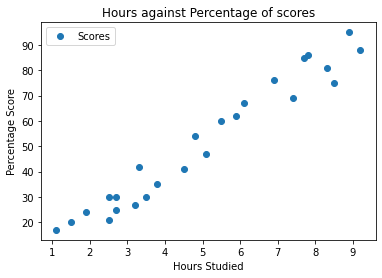

In [6]:
# Plotting the distribution of scores
HS_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours against Percentage of scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
#Drop a column
HS_data.pop('Unnamed: 0')

0     2.5,21
1     5.1,47
2     3.2,27
3     8.5,75
4     3.5,30
5     1.5,20
6     9.2,88
7     5.5,60
8     8.3,81
9     2.7,25
10    7.7,85
11    5.9,62
12    4.5,41
13    3.3,42
14    1.1,17
15    8.9,95
16    2.5,30
17    1.9,24
18    6.1,67
19    7.4,69
20    2.7,30
21    4.8,54
22    3.8,35
23    6.9,76
24    7.8,86
Name: Unnamed: 0, dtype: object

In [8]:
print(HS_data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [9]:
X = HS_data.iloc[:, :-1].values  
y = HS_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


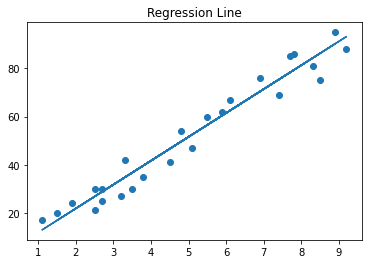

In [12]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title("Regression Line")
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# Comparing Actual vs Predicted
HS_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(HS_data)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [15]:
# You can also test with your own data
hours=9.25
hours=np.array(hours).reshape(1, -1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


> ****Y'all Have A Good Evening!!